In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

mpl.rcParams["savefig.dpi"] = 300
# mpl.rcParams["figure.dpi"] = 300

SEED = 42
np.random.seed(SEED)

sns.set_theme()

In [2]:
bdi = pd.read_csv("../data/cleaned/BDI.csv") 
uncertainty_idx = pd.read_csv("../data/cleaned/Uncertainty_Indices.csv") 
bdi = bdi.set_index("Time")
uncertainty_idx = uncertainty_idx.set_index("Time")
display(bdi)
uncertainty_idx

,BDI,Period
Time,,
2001-11-30,855.22727,1
2001-12-31,870.17647,1
2002-01-31,931.31818,1
2002-02-28,1365.39130,1
2002-03-31,1460.42857,1
...,...,...
2022-08-31,2943.04762,2
2022-09-30,2389.45000,2
2022-10-31,2076.95238,2


,GEPU_current,GEPU_ppp,USA-Three_Component_Index,USA-News_Based_Policy_Uncert_Index,USA-1. Economic Policy Uncertainty,USA-2. Monetary policy,USA-Fiscal Policy (Taxes OR Spending),USA-3. Taxes,USA-4. Government spending,USA-5. Health care,...,WUI-TUN,WUI-TUR,WUI-TWN,WUI-TZA,WUI-UGA,WUI-UKR,WUI-USA,WUI-VEN,WUI-VNM,WUI-ZAF
Time,,,,,,,,,,,,,,,,,,,,,
2001-11-30,126.150648,121.680190,131,172,153.501517,197.338192,178.865960,189.648471,147.902582,126.608474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,107.734812,104.203253,117,150,125.334107,96.788720,122.151329,128.878255,79.055158,96.863408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-31,106.974245,105.715560,117,148,138.214459,137.560525,172.928865,184.245205,152.855754,203.995586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,117.630213,118.443801,112,129,110.565300,120.576719,97.304104,102.478109,84.332115,151.289716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,122.379655,117.279174,123,162,138.051437,206.866963,134.741822,139.986633,119.761268,123.811135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,290.452395,301.851162,168,190,129.405453,149.561051,109.103801,106.331516,70.948534,146.695483,...,0.233,0.353,0.472,0.000,0.394,0.072,0.105,0.132,0.095,0.480
2022-09-30,274.722090,292.320462,146,153,130.391300,138.594295,127.603919,134.186375,53.372440,136.040564,...,0.260,0.159,0.369,0.114,0.320,0.063,0.117,0.128,0.290,0.370
2022-10-31,315.962071,326.803119,187,223,138.266430,161.917595,117.834775,124.455184,55.073651,201.773303,...,0.174,0.285,0.324,0.118,0.469,0.077,0.117,0.144,0.000,0.269


In [3]:
bdi1 = bdi.query("Period == 1")
bdi2 = bdi.query("Period == 2")
display(bdi1)
display(bdi2)

,BDI,Period
Time,,
2001-11-30,855.22727,1
2001-12-31,870.17647,1
2002-01-31,931.31818,1
2002-02-28,1365.39130,1
2002-03-31,1460.42857,1
...,...,...
2011-09-30,1433.22727,1
2011-10-31,1365.52381,1
2011-11-30,1386.95455,1


,BDI,Period
Time,,
2012-02-29,952.43478,2
2012-03-31,1024.63636,2
2012-04-30,855.68750,2
2012-05-31,702.61905,2
2012-06-30,858.95455,2
...,...,...
2022-08-31,2943.04762,2
2022-09-30,2389.45000,2
2022-10-31,2076.95238,2


In [4]:
uncertainty_idx1 = uncertainty_idx.query("Period == 1")
uncertainty_idx2 = uncertainty_idx.query("Period == 2")
display(uncertainty_idx1)
display(uncertainty_idx2)

,GEPU_current,GEPU_ppp,USA-Three_Component_Index,USA-News_Based_Policy_Uncert_Index,USA-1. Economic Policy Uncertainty,USA-2. Monetary policy,USA-Fiscal Policy (Taxes OR Spending),USA-3. Taxes,USA-4. Government spending,USA-5. Health care,...,WUI-TUN,WUI-TUR,WUI-TWN,WUI-TZA,WUI-UGA,WUI-UKR,WUI-USA,WUI-VEN,WUI-VNM,WUI-ZAF
Time,,,,,,,,,,,,,,,,,,,,,
2001-11-30,126.150648,121.680190,131,172,153.501517,197.338192,178.865960,189.648471,147.902582,126.608474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,107.734812,104.203253,117,150,125.334107,96.788720,122.151329,128.878255,79.055158,96.863408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-31,106.974245,105.715560,117,148,138.214459,137.560525,172.928865,184.245205,152.855754,203.995586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,117.630213,118.443801,112,129,110.565300,120.576719,97.304104,102.478109,84.332115,151.289716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,122.379655,117.279174,123,162,138.051437,206.866963,134.741822,139.986633,119.761268,123.811135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-09-30,117.027803,111.402561,158,139,108.181529,91.964039,138.416236,135.227819,163.974968,182.935223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31,155.287376,154.439704,198,207,171.199325,160.645572,285.895281,249.667429,563.719874,343.905846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-30,214.361551,211.526772,245,284,215.124305,231.148969,322.082306,261.133875,635.271777,398.309280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,GEPU_current,GEPU_ppp,USA-Three_Component_Index,USA-News_Based_Policy_Uncert_Index,USA-1. Economic Policy Uncertainty,USA-2. Monetary policy,USA-Fiscal Policy (Taxes OR Spending),USA-3. Taxes,USA-4. Government spending,USA-5. Health care,...,WUI-TUN,WUI-TUR,WUI-TWN,WUI-TZA,WUI-UGA,WUI-UKR,WUI-USA,WUI-VEN,WUI-VNM,WUI-ZAF
Time,,,,,,,,,,,,,,,,,,,,,
2012-02-29,158.586135,162.396311,166,166,158.686460,89.778905,266.044306,273.768582,318.553212,409.485816,...,0.999,0.285,0.275,0.000,0.120,0.095,0.115,0.598,0.103,0.576
2012-03-31,173.901468,171.905912,187,206,191.866122,126.069811,372.089843,375.099764,455.690910,441.450939,...,1.418,0.580,0.224,0.242,0.096,0.000,0.480,0.453,0.108,0.861
2012-04-30,168.534581,166.604422,193,215,193.696873,104.012226,374.307149,409.293066,426.221276,381.166707,...,0.642,0.289,0.247,0.210,0.098,0.097,0.711,0.281,0.085,0.405
2012-05-31,141.622551,147.885446,150,119,100.170604,71.550143,120.161512,124.686678,103.481432,159.794072,...,0.500,0.247,0.317,0.313,0.204,0.187,0.083,0.301,0.100,0.663
2012-06-30,134.292361,148.068999,138,99,77.730018,30.020062,87.924209,83.269505,84.017382,143.532177,...,0.909,0.570,0.414,0.320,0.307,0.270,0.080,0.199,0.099,0.725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,290.452395,301.851162,168,190,129.405453,149.561051,109.103801,106.331516,70.948534,146.695483,...,0.233,0.353,0.472,0.000,0.394,0.072,0.105,0.132,0.095,0.480
2022-09-30,274.722090,292.320462,146,153,130.391300,138.594295,127.603919,134.186375,53.372440,136.040564,...,0.260,0.159,0.369,0.114,0.320,0.063,0.117,0.128,0.290,0.370
2022-10-31,315.962071,326.803119,187,223,138.266430,161.917595,117.834775,124.455184,55.073651,201.773303,...,0.174,0.285,0.324,0.118,0.469,0.077,0.117,0.144,0.000,0.269


In [5]:
for i, col in enumerate(uncertainty_idx1.dropna(axis=1).columns):
    print(col)

GEPU_current
GEPU_ppp
USA-Three_Component_Index
USA-News_Based_Policy_Uncert_Index
USA-1. Economic Policy Uncertainty
USA-2. Monetary policy
USA-Fiscal Policy (Taxes OR Spending)
USA-3. Taxes
USA-4. Government spending
USA-5. Health care
USA-6. National security
USA-7. Entitlement programs
USA-8. Regulation
USA-Financial Regulation
USA-9. Trade policy
USA-10. Sovereign debt, currency crises
Australia News-Based EPU
EPU Belgium
EPU Belgium (Dutch language)
EPU Belgium (French language)
Brazil News-Based EPU
Canada News-Based Policy Uncertainty Index
CHL-EPU*
CHL-EPUC**
China News-Based EPU
CHN-TPU
CHN-EPU
COL-EU_SA*
COL-EUC_SA
COL-EPU_SA
COL-EPUC_SA
COL-EU
COL-EUC
COL-EPU
COL-EPUC
COL-EPU.1
COL-EPUC.1
DNK-EPU_BBD*
DNK-EPU_extended**
European_News_Index
Germany_News_Index
Italy_News_Index
UK_News_Index
France_News_Index
Spain_News_Index
GRC-epu_gr
GRC-EPU
GRC-EU
GRC-EPUC
GRC-EPUB
GRC-EPUF
GRC-EPUD
GRC-EPUT
GRC-EPUM
GRC-EPUP
Monthly_HKEPU_Index
IRL-EPU Index
Ireland Economic Policy Uncert

In [6]:
uncertainty_idx1.select_dtypes(include='number').apply(lambda x: np.corrcoef(bdi1["BDI"], x)[0, 1], axis=0)

/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


GEPU_current                         -0.358119
GEPU_ppp                             -0.331973
USA-Three_Component_Index            -0.363320
USA-News_Based_Policy_Uncert_Index   -0.367014
USA-1. Economic Policy Uncertainty   -0.411513
                                        ...   
WUI-UKR                                    NaN
WUI-USA                                    NaN
WUI-VEN                                    NaN
WUI-VNM                                    NaN
WUI-ZAF                                    NaN
Length: 478, dtype: float64

In [7]:
# Find the specific factors used by the paper
substrings = [
    "UK",
    "Canada",
    "Australia",
    "JPN",
    "GEPU",
    "US",
    "IRL",
    "EMV",
    "ESP",
    "CHL"
]

for substring in substrings:
    display([col for col in uncertainty_idx1.columns if col.lower().find(substring.lower()) >= 0])

['UK_News_Index', 'UK_EPU_Index', 'GPRC_UKR', 'GPRHC_UKR', 'WUI-UKR']

['Canada News-Based Policy Uncertainty Index']

['Australia News-Based EPU']

['JPNNews-based Economic Policy Uncertainty Index',
 'JPNEconomic Policy Uncertainty',
 'JPN-Fiscal Policy Uncertainty',
 'JPN-Monetary Policy Uncertainty',
 'JPN-Trade Policy Uncertainty',
 'JPN-Exchange Rate Policy Uncertainty',
 'GPRC_JPN',
 'GPRHC_JPN',
 'JPN-News-based Economic Policy Uncertainty Index',
 'JPN-Economic Policy Uncertainty',
 'WUI-JPN']

['GEPU_current', 'GEPU_ppp']

['USA-Three_Component_Index',
 'USA-News_Based_Policy_Uncert_Index',
 'USA-1. Economic Policy Uncertainty',
 'USA-2. Monetary policy',
 'USA-Fiscal Policy (Taxes OR Spending)',
 'USA-3. Taxes',
 'USA-4. Government spending',
 'USA-5. Health care',
 'USA-6. National security',
 'USA-7. Entitlement programs',
 'USA-8. Regulation',
 'USA-Financial Regulation',
 'USA-9. Trade policy',
 'USA-10. Sovereign debt, currency crises',
 'Australia News-Based EPU',
 'RUSNews-Based Policy Uncertainty Index',
 'Infectious Disease EMV Tracker',
 'Macro - Business Investment and Sentiment EMV Tracker',
 'Housing and Land Management EMV Tracker',
 'GPRC_AUS',
 'GPRC_RUS',
 'GPRC_USA',
 'GPRHC_AUS',
 'GPRHC_RUS',
 'GPRHC_USA',
 'RUS-News-Based Policy Uncertainty Index',
 'WUI-AUS',
 'WUI-RUS',
 'WUI-USA']

['IRL-EPU Index', 'IRL-Domestic Economic Policy Uncertainty', 'WUI-IRL']

['Overall EMV Tracker',
 'Policy-Related EMV Tracker',
 'Infectious Disease EMV Tracker',
 'Macroeconomic News and Outlook EMV Tracker',
 'Macro - Broad Quantity Indicators EMV Tracker',
 'Macro - Inflation EMV Indicator',
 'Macro - Interest Rates EMV Tracker',
 'Macro - Other Financial Indicators EMV Tracker',
 'Macro - Labor Markets EMV Tracker',
 'Macro - Real Estate Markets EMV Tracker',
 'Macro - Trade EMV Tracker',
 'Macro - Business Investment and Sentiment EMV Tracker',
 'Macro - Consumer Spending and Sentiment EMV Tracker',
 'Commodity Markets EMV Tracker',
 'Financial Crises EMV Tracker',
 'Exchange Rates EMV Tracker',
 'Healthcare Matters EMV Tracker',
 'Litigation Matters EMV Tracker',
 'Competition Matters EMV Tracker',
 'Labor Disputes EMV Tracker',
 'Intellectual Property Matters EMV Tracker',
 'Fiscal Policy EMV Tracker',
 'Taxes EMV Tracker',
 'Government Spending, Deficits, and Debt EMV Tracker',
 'Entitlement and Welfare Programs EMV Tracker',
 'Monetary Policy EMV T

['GPRC_ESP', 'GPRHC_ESP', 'WUI-ESP']

['CHL-EPU*', 'CHL-EPUC**', 'GPRC_CHL', 'GPRHC_CHL', 'WUI-CHL']

In [8]:
# The 10 indices used in the paper for each period
raw_features = [
    "UK_EPU_Index",
    "CA-EPU_National",
    "Australia News-Based EPU", # TODO: Aus, can't seem to find EPU-A
    "JPNEconomic Policy Uncertainty",
    "GEPU_ppp",
    "USA-Financial Regulation", # TODO: AFR
    "IRL-EPU Index",
    "Policy-Related EMV Tracker", # TODO: stock market macronomic policies
    "Spain_News_Index", # TODO: EPU spain
    "CHL-EPUC**",
]
len(raw_features)

10

In [9]:
period1_features = uncertainty_idx1[raw_features]
period1_features

,UK_EPU_Index,CA-EPU_National,Australia News-Based EPU,JPNEconomic Policy Uncertainty,GEPU_ppp,USA-Financial Regulation,IRL-EPU Index,Policy-Related EMV Tracker,Spain_News_Index,CHL-EPUC**
Time,,,,,,,,,,
2001-11-30,146.115312,191.569789,145.553593,97.863215,121.680190,69.029942,102.350765,14.0271,110.790603,132.89
2001-12-31,108.114125,120.230510,104.725423,112.129266,104.203253,81.052099,181.673545,12.7562,122.910453,145.10
2002-01-31,85.506579,115.841885,41.125087,115.661781,105.715560,54.306179,141.464839,15.9552,139.735284,164.53
2002-02-28,108.429754,104.677695,100.881727,147.045417,118.443801,109.050268,108.231555,16.6725,269.596749,167.29
2002-03-31,115.099583,155.907506,129.513952,115.276559,117.279174,162.975794,109.278023,13.1787,180.914732,130.92
...,...,...,...,...,...,...,...,...,...,...
2011-09-30,122.697666,85.470043,152.592023,119.834536,111.402561,149.832579,95.026918,9.7121,139.968638,84.54
2011-10-31,149.028294,174.865790,229.396840,149.604324,154.439704,260.249891,62.503365,13.4354,185.045261,91.63
2011-11-30,177.753123,213.929493,337.043863,233.145558,211.526772,224.130293,130.156317,29.7518,183.241509,163.85


In [27]:
# first try period I
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid  = train_test_split(period1_features, bdi1["BDI"], train_size=0.9, shuffle=False)
display(X_train)
display(X_valid)
display(y_train)
display(y_valid)

,UK_EPU_Index,CA-EPU_National,Australia News-Based EPU,JPNEconomic Policy Uncertainty,GEPU_ppp,USA-Financial Regulation,IRL-EPU Index,Policy-Related EMV Tracker,Spain_News_Index,CHL-EPUC**
Time,,,,,,,,,,
2001-11-30,146.115312,191.569789,145.553593,97.863215,121.680190,69.029942,102.350765,14.0271,110.790603,132.89
2001-12-31,108.114125,120.230510,104.725423,112.129266,104.203253,81.052099,181.673545,12.7562,122.910453,145.10
2002-01-31,85.506579,115.841885,41.125087,115.661781,105.715560,54.306179,141.464839,15.9552,139.735284,164.53
2002-02-28,108.429754,104.677695,100.881727,147.045417,118.443801,109.050268,108.231555,16.6725,269.596749,167.29
2002-03-31,115.099583,155.907506,129.513952,115.276559,117.279174,162.975794,109.278023,13.1787,180.914732,130.92
...,...,...,...,...,...,...,...,...,...,...
2010-08-31,243.538578,88.661124,279.425273,184.635670,141.905748,159.664087,139.148781,12.9636,162.265207,88.42
2010-09-30,184.018279,112.530661,223.951310,204.073776,132.889740,353.070518,141.483678,10.5280,130.798786,93.62
2010-10-31,142.861633,154.388957,184.577551,142.538850,133.681363,551.317105,170.598304,10.2861,130.476739,87.07


,UK_EPU_Index,CA-EPU_National,Australia News-Based EPU,JPNEconomic Policy Uncertainty,GEPU_ppp,USA-Financial Regulation,IRL-EPU Index,Policy-Related EMV Tracker,Spain_News_Index,CHL-EPUC**
Time,,,,,,,,,,
2011-01-31,149.690907,101.410837,200.259476,161.798466,170.269630,473.074156,210.465731,14.6972,103.962063,112.85
2011-02-28,123.680148,88.957571,84.434412,108.658100,116.063115,188.610487,155.640337,9.5041,120.284546,32.17
2011-03-31,209.898494,161.962912,287.168360,157.998550,204.322067,165.748609,124.457571,10.4851,181.497894,102.47
2011-04-30,140.627979,146.690981,218.746855,137.014583,190.839742,140.287780,231.892940,10.9325,102.097068,189.79
2011-05-31,119.121279,77.725554,75.667684,105.472829,91.648797,112.070558,93.466358,6.3199,61.842588,58.86
2011-06-30,131.422538,103.263511,114.818092,108.928526,124.607360,179.944484,175.772939,7.9720,106.348446,86.27
2011-07-31,97.936990,97.400378,63.936162,119.549044,116.012599,230.380458,181.348667,8.7578,161.906470,81.08
2011-08-31,94.244069,65.911502,117.641877,117.633415,84.944992,87.763984,152.446684,6.7627,98.418303,49.93
2011-09-30,122.697666,85.470043,152.592023,119.834536,111.402561,149.832579,95.026918,9.7121,139.968638,84.54


Time
2001-11-30     855.22727
2001-12-31     870.17647
2002-01-31     931.31818
2002-02-28    1365.39130
2002-03-31    1460.42857
                 ...    
2010-08-31    3838.05263
2010-09-30    3088.00000
2010-10-31    1909.72727
2010-11-30    2432.33333
2010-12-31    2719.45455
Name: BDI, Length: 110, dtype: float64

Time
2011-01-31    2072.47619
2011-02-28    1401.40000
2011-03-31    1835.31818
2011-04-30    1868.82353
2011-05-31    1181.10000
2011-06-30    1492.69565
2011-07-31    1342.55556
2011-08-31    1352.40000
2011-09-30    1433.22727
2011-10-31    1365.52381
2011-11-30    1386.95455
2011-12-31    1840.40909
2012-01-31    1039.38095
Name: BDI, dtype: float64

In [28]:
# eps = 1e-8
# X_train = np.log(eps + X_train)
# X_valid = np.log(eps + X_valid)
# y_train = np.log(eps + y_train)
# y_valid = np.log(eps + y_valid)

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(110, 10)

In [30]:
from tslearn.clustering import KShape, TimeSeriesKMeans

n_clusters = 3
kshape = KShape(n_clusters=n_clusters, random_state=SEED, max_iter=100, tol=1e-12)
# kshape = TimeSeriesKMeans(n_clusters=n_clusters, random_state=SEED, max_iter=100) # Looks normal
# fit expects shape [no. time series, length of series]
p1_clusters = kshape.fit_predict(X_train_scaled.transpose())
p1_clusters

/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/andrewwu/personal-projects/BDI-Prophet/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 2, 2, 2])

In [31]:
X_train.columns

Index(['UK_EPU_Index', 'CA-EPU_National', 'Australia News-Based EPU',
       'JPNEconomic Policy Uncertainty', 'GEPU_ppp',
       'USA-Financial Regulation', 'IRL-EPU Index',
       'Policy-Related EMV Tracker', 'Spain_News_Index', 'CHL-EPUC**'],
      dtype='object')

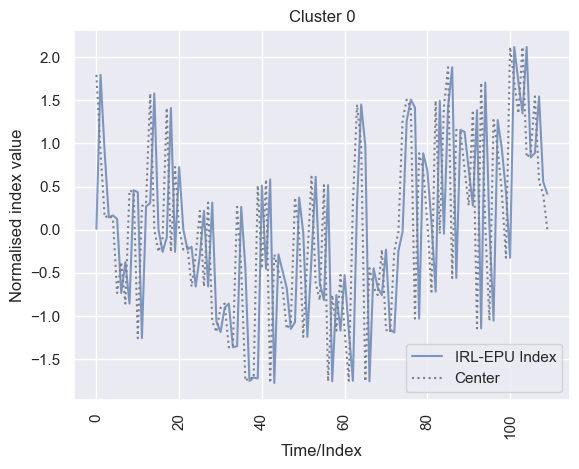

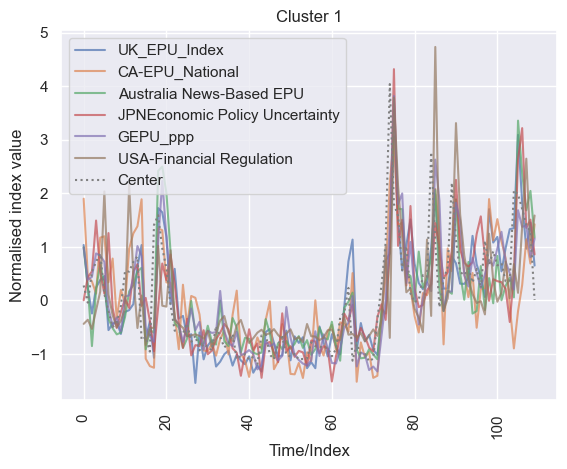

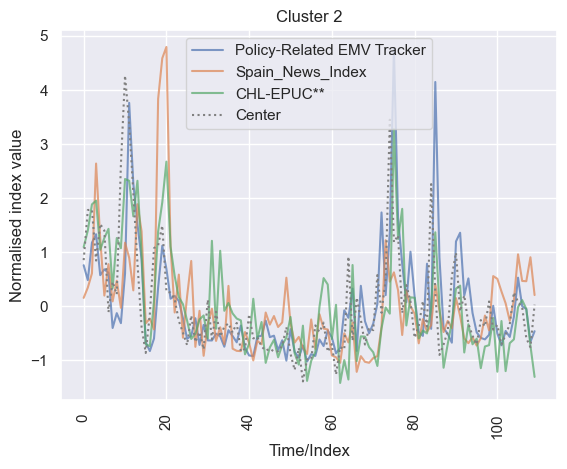

In [32]:
for cluster in range(n_clusters):
   fig, ax = plt.subplots()

   # for col in X_train_scaled.columns[p1_clusters == cluster]:
   #    ax.plot(X_train_scaled[col], label=col)
   for i in range(X_train_scaled.shape[1]):
      if p1_clusters[i] == cluster:
         ax.plot(X_train_scaled[:, i], label=X_train.columns[i], alpha=0.7)

   ax.plot(kshape.cluster_centers_[cluster], label="Center", color="grey", linestyle="dotted")
   ax.legend()
   ax.tick_params(axis='x', labelrotation=90)
   ax.set(
      xlabel="Time/Index" ,
      ylabel="Normalised index value",
      title=f"Cluster {cluster}"
   )

In [44]:


holidays = pd.DataFrame(
    {
       "holiday" : [
            "Subprime Mortage Crisis",
            "GFC Escalation",
            "GFC Stock Market Collapse",
            "Economic Stimulus Bill",
            "IMF declares deep recession",
            "Sovereign Debt Crisis Europe",
            "Sovereign Debt Crisis Escalation",
            "Sovereign Debt Crisis Spread",
            "Monetary policy/fiscal response to Sovereign Debt Crisis",
            "Signs of easing"
        ],
       "ds": pd.to_datetime(
           ["2007-08", "2008-09", "2008-10", "2009-01", "2009-06", "2010-07", "2010-08", "2011-01", "2011-02", "2012-01"]
       ) + pd.offsets.MonthEnd(0),
       "lower_window": [0] * 10,
       "upper_window": [1] * 10 # Assume the event effects last 3 months
    }
)

In [45]:
from prophet import Prophet

model_params = {
   "growth": "linear", # why does my linear trend have no change points?
   "mcmc_samples": 0, # TODO: change to 20,000 later, for better uncertainty intervals
   "yearly_seasonality": True,
   "weekly_seasonality": False,
   "daily_seasonality": False,
   "seasonality_mode": "additive",
   "changepoint_prior_scale": 0.42,
   "changepoint_range": 0.65,
   "seasonality_prior_scale": 0.5,
   "scaling": "minmax",
   "holidays": holidays,
   "holidays_prior_scale": 10,
}

model = Prophet(**model_params)

In [46]:
p1_train_df = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
p1_train_df["ds"] = pd.Series(X_train.index) 
p1_train_df["y"] = pd.Series(y_train.values)
p1_train_df

,UK_EPU_Index,CA-EPU_National,Australia News-Based EPU,JPNEconomic Policy Uncertainty,GEPU_ppp,USA-Financial Regulation,IRL-EPU Index,Policy-Related EMV Tracker,Spain_News_Index,CHL-EPUC**,ds,y
0,1.034636,1.898482,0.991574,0.003146,0.987655,-0.437537,0.009451,0.757059,0.153226,1.092270,2001-11-30,855.22727
1,0.233121,0.444029,0.270655,0.434637,0.386747,-0.360689,1.794902,0.481649,0.342832,1.397128,2001-12-31,870.17647
2,-0.243714,0.354554,-0.852362,0.541481,0.438745,-0.531654,0.889857,1.174889,0.606044,1.882255,2002-01-31,931.31818
3,0.239778,0.126941,0.202785,1.490710,0.876379,-0.181720,0.141820,1.330331,2.637630,1.951166,2002-02-28,1365.39130
4,0.380457,1.171406,0.708356,0.529830,0.836336,0.162981,0.165375,0.573207,1.250266,1.043084,2002-03-31,1460.42857
...,...,...,...,...,...,...,...,...,...,...,...,...
105,3.089471,-0.199602,3.355401,2.627664,1.683069,0.141812,0.837726,0.526593,0.958508,-0.018052,2010-08-31,3838.05263
106,1.834079,0.287046,2.375875,3.215589,1.373072,1.378099,0.890281,-0.001214,0.466239,0.111781,2010-09-30,3088.00000
107,0.966010,1.140446,1.680636,1.354404,1.400290,2.645325,1.545613,-0.053635,0.461201,-0.051758,2010-10-31,1909.72727
108,1.453708,0.687766,2.043586,1.507669,0.806098,0.981806,0.555878,-0.658416,0.904376,-0.734131,2010-11-30,2432.33333


In [47]:
# for col in p1_train_df.columns:
#     if col in ("ds", "y"):
#         continue

#     model.add_regressor(col)

In [48]:
model.fit(p1_train_df)

07:40:05 - cmdstanpy - INFO - Chain [1] start processing
07:40:05 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
model.changepoints

3    2002-02-28
6    2002-05-31
8    2002-07-31
11   2002-10-31
14   2003-01-31
17   2003-04-30
20   2003-07-31
22   2003-09-30
25   2003-12-31
28   2004-03-31
31   2004-06-30
34   2004-09-30
36   2004-11-30
39   2005-02-28
42   2005-05-31
45   2005-08-31
48   2005-11-30
50   2006-01-31
53   2006-04-30
56   2006-07-31
59   2006-10-31
62   2007-01-31
64   2007-03-31
67   2007-06-30
70   2007-09-30
Name: ds, dtype: datetime64[ns]

In [50]:
model.params['delta']

array([[-3.67732e-09, -3.12845e-08, -1.95793e-08,  1.58382e-08,
        -1.07765e-09, -7.69955e-09, -1.29153e-04, -2.20590e-02,
        -6.96899e-02, -1.08710e-01, -3.55220e-02,  2.41178e-08,
        -1.28791e-08, -2.26177e-08,  1.16482e-09,  2.84790e-06,
         1.12162e-02,  7.26857e-02,  4.23973e-02,  1.58071e-06,
         8.68444e-09,  9.97877e-09, -2.58130e-01, -5.40860e-01,
        -7.80409e-01]])

In [51]:
p1_valid_df = pd.DataFrame(data=scaler.transform(X_valid), columns=X_valid.columns)
p1_valid_df["ds"] = pd.Series(X_valid.index)
p1_valid_df["y"] = y_valid.values 
p1_valid_df

,UK_EPU_Index,CA-EPU_National,Australia News-Based EPU,JPNEconomic Policy Uncertainty,GEPU_ppp,USA-Financial Regulation,IRL-EPU Index,Policy-Related EMV Tracker,Spain_News_Index,CHL-EPUC**,ds,y
0,1.110052,0.060337,1.957538,1.936930,2.658301,2.145183,2.442976,0.902274,0.046398,0.591914,2011-01-31,2072.47619
1,0.561437,-0.193558,-0.087632,0.329648,0.794524,0.326842,1.208929,-0.223098,0.301751,-1.422496,2011-02-28,1401.40000
2,2.379940,1.294862,3.492124,1.821998,3.829123,0.180705,0.507046,-0.010511,1.259389,0.332747,2011-03-31,1835.31818
3,0.918898,0.983501,2.283978,1.187318,3.365562,0.017955,2.925274,0.086443,0.017222,2.512944,2011-04-30,1868.82353
4,0.465282,-0.422555,-0.242430,0.233306,-0.044911,-0.162414,-0.190525,-0.913131,-0.612530,-0.756103,2011-05-31,1181.10000
5,0.724738,0.098109,0.448865,0.337827,1.088300,0.271448,1.662087,-0.555113,0.083732,-0.071733,2011-06-30,1492.69565
6,0.018466,-0.021428,-0.449578,0.659055,0.792787,0.593843,1.787589,-0.384826,0.952896,-0.201316,2011-07-31,1342.55556
7,-0.059424,-0.663418,0.498726,0.601115,-0.275408,-0.317786,1.137044,-0.817174,-0.040330,-0.979066,2011-08-31,1352.40000
8,0.540715,-0.264662,1.115855,0.667690,0.634280,0.078967,-0.155399,-0.178024,0.609695,-0.114927,2011-09-30,1433.22727
9,1.096076,1.557924,2.472029,1.568107,2.114023,0.784774,-0.887461,0.628835,1.314885,0.062095,2011-10-31,1365.52381


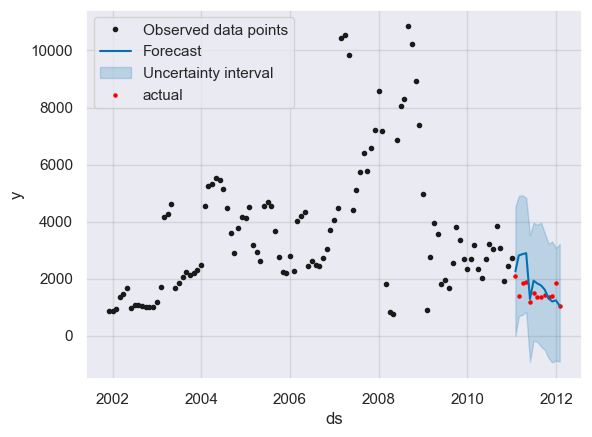

In [52]:
forecasts = model.predict(p1_valid_df)
fig, ax = plt.subplots()
model.plot(forecasts, ax=ax);
ax.scatter(forecasts.ds, y_valid.values, color="red", label="actual", s=5)
ax.legend();

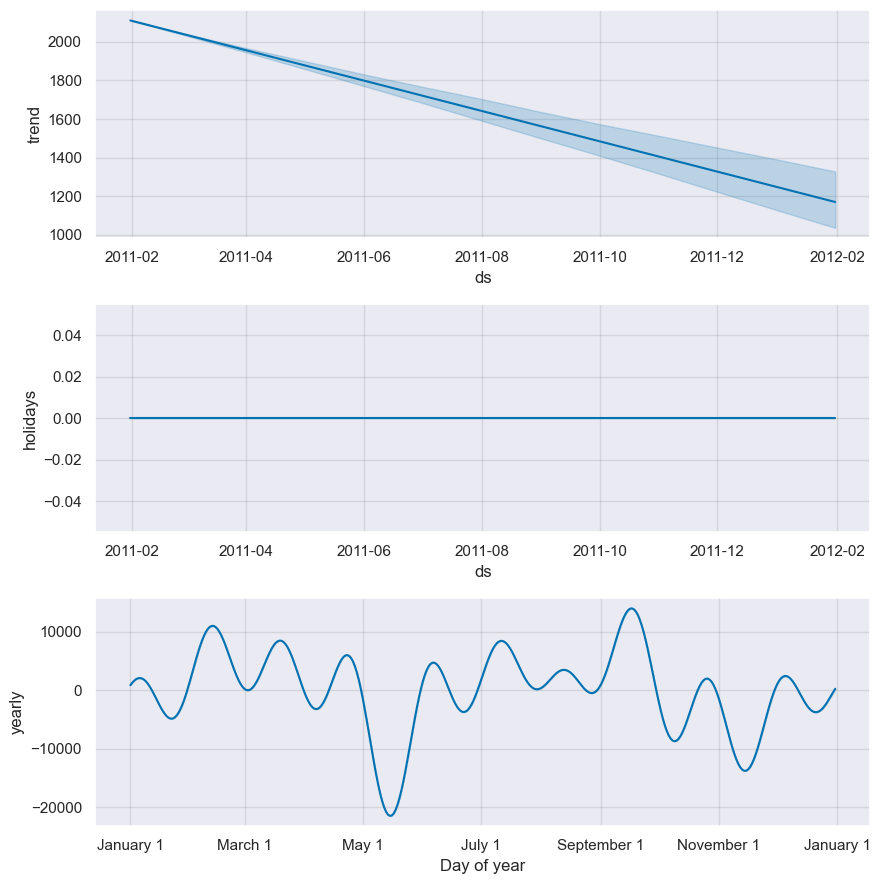

In [53]:
model.plot_components(forecasts);

In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

metrics = [
    mean_absolute_error,
    mean_absolute_percentage_error,
    root_mean_squared_error
]

preds = forecasts["yhat"]

for metric in metrics:
    val = metric(y_true=y_valid.values, y_pred=preds)
    print(f"{metric.__name__}: {val:.4f}")

mean_absolute_error: 467.8789
mean_absolute_percentage_error: 0.2970
root_mean_squared_error: 628.1218
